# TMDB Movie Analysis

## Introduction
In this analysis, we set out to analyze TMDB movie dataset to get insights and answer all our burning curiousity.

The dataset is from [Kaggle: 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and contains information about 4803 movies collected from The Movie Database (TMDb), including popularity, revenue, budget, cast and genres.

## Questions
Based on the dataset, we are interested to know:
1. Does having a higher budget results in a higher revenue and profit?
2. Which genres are associated with high popularity?
3. Which director produces the highest revenue movies?
4. Which actor is associated with higher popularity and revenue profit?
5. Which year produced movies with the highest grossing revenue?

***

## Data Wrangling and Cleaning

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import CSV
df_credits = pd.read_csv('D:/Users/Ivanoir/Documents/Data Analytics/TMDB Movie Analysis/tmdb_5000_credits.csv')
df_movies = pd.read_csv('D:/Users/Ivanoir/Documents/Data Analytics/TMDB Movie Analysis/tmdb_5000_movies.csv')

In [2]:
# View first 5 rows in credits
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
# View first 5 rows in movies
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# Basic information about credits
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
# Basic information about movies
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
# Handle duplicates in credits
df_credits.duplicated().sum()

0

In [7]:
# Handle duplicates in movies
df_movies.duplicated().sum()

0

In [8]:
# Find percentage of null values in credits
df_credits.isnull().sum()/len(df_credits)*100

movie_id    0.0
title       0.0
cast        0.0
crew        0.0
dtype: float64

In [9]:
# Find percentage of null values in movies
df_movies.isnull().sum()/len(df_movies)*100

budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title                    0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64

In [10]:
# Drop homepage, tagline, keywords and other unnecessary fields that will not be analyze
df_movies.drop(['homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'production_countries', 'original_language', 'spoken_languages','status', 'title', 'vote_count'], axis=1, inplace=True)

# Confirm that columns are dropped
df_movies.head()

,budget,genres,id,original_title,popularity,release_date,revenue,runtime,vote_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,2015-10-26,880674609,148.0,6.3
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,2012-03-07,284139100,132.0,6.1


In [11]:
# Check to see if the id's on both dataframes are the same before merging
df_credits['movie_id'].equals(df_movies['id'])

True

In [12]:
# Merge df_credits and df_movies on their 'id'
df = pd.merge(left=df_credits, right=df_movies, left_on='movie_id', right_on='id')

# Confirm that both dataframes are merge
df.head()

,movie_id,title,cast,crew,budget,genres,id,original_title,popularity,release_date,revenue,runtime,vote_average
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,107.376788,2015-10-26,880674609,148.0,6.3
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,43.926995,2012-03-07,284139100,132.0,6.1


In [13]:
# Retrieve the value in the key 'name' and split into an array of strings
df['genres'] = df['genres'].apply(lambda x: ','.join([i['name'] for i in eval(x)])).str.split(',')
df['cast'] = df['cast'].apply(lambda x: ','.join([i['name'] for i in eval(x)])).str.split(',')

df.head()

,movie_id,title,cast,crew,budget,genres,id,original_title,popularity,release_date,revenue,runtime,vote_average
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[Action, Adventure, Crime]",206647,Spectre,107.376788,2015-10-26,880674609,148.0,6.3
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[Action, Crime, Drama, Thriller]",49026,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[Action, Adventure, Science Fiction]",49529,John Carter,43.926995,2012-03-07,284139100,132.0,6.1


In [14]:
# Parse the stringified crew into their corresponding python objects
from ast import literal_eval
for i in ['crew']:
    df[i] = df[i].apply(literal_eval)
    
# Get the director's name from the crew. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df['director'] = df['crew'].apply(get_director)

df.head()

,movie_id,title,cast,crew,budget,genres,id,original_title,popularity,release_date,revenue,runtime,vote_average,director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,Gore Verbinski
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[Action, Adventure, Crime]",206647,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,Sam Mendes
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[Action, Crime, Drama, Thriller]",49026,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,Christopher Nolan
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[Action, Adventure, Science Fiction]",49529,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,Andrew Stanton


In [15]:
# Retrieve the year from 'release_date' and create a new column 'release_year'
df['release_year'] = df['release_date'].astype(str).str[:4]

df.head()

,movie_id,title,cast,crew,budget,genres,id,original_title,popularity,release_date,revenue,runtime,vote_average,director,release_year
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,James Cameron,2009
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,Gore Verbinski,2007
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[Action, Adventure, Crime]",206647,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,Sam Mendes,2015
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[Action, Crime, Drama, Thriller]",49026,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,Christopher Nolan,2012
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[Action, Adventure, Science Fiction]",49529,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,Andrew Stanton,2012


In [16]:
# Drop unnecessary and redundant columns
df.drop(['movie_id', 'title', 'crew', 'release_date'], axis=1, inplace=True)

# Rearrange columns
df = df[['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'director', 'runtime', 'genres', 'vote_average', 'release_year']]

# Confirm that columns are dropped and rearranged
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,19995,150.437577,237000000,2787965087,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009
1,285,139.082615,300000000,961000000,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,169.0,"[Adventure, Fantasy, Action]",6.9,2007
2,206647,107.376788,245000000,880674609,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,148.0,"[Action, Adventure, Crime]",6.3,2015
3,49026,112.312950,250000000,1084939099,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,165.0,"[Action, Crime, Drama, Thriller]",7.6,2012
4,49529,43.926995,260000000,284139100,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,132.0,"[Action, Adventure, Science Fiction]",6.1,2012


In [17]:
# Create a column for profit and profit margin
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit']/df['revenue']*100

df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,19995,150.437577,237000000,2787965087,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009,2550965087,91.499176
1,285,139.082615,300000000,961000000,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,169.0,"[Adventure, Fantasy, Action]",6.9,2007,661000000,68.782518
2,206647,107.376788,245000000,880674609,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,148.0,"[Action, Adventure, Crime]",6.3,2015,635674609,72.180417
3,49026,112.312950,250000000,1084939099,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,165.0,"[Action, Crime, Drama, Thriller]",7.6,2012,834939099,76.957232
4,49529,43.926995,260000000,284139100,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,132.0,"[Action, Adventure, Science Fiction]",6.1,2012,24139100,8.495522


## Data Analysis

### Question 1: Does having a higher budget results in a higher revenue and profit?

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,profit,profit_margin
count,4803.000000,4803.000000,4.803000e+03,4.803000e+03,4801.000000,4803.000000,4.803000e+03,3913.000000
mean,57165.484281,21.492301,2.904504e+07,8.226064e+07,106.875859,6.092172,5.321560e+07,-inf
std,88694.614033,31.816650,4.072239e+07,1.628571e+08,22.611935,1.194612,1.359677e+08,NaN
min,5.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.657101e+08,-inf
25%,9014.500000,4.668070,7.900000e+05,0.000000e+00,94.000000,5.600000,-7.995375e+05,-83.333333
50%,14629.000000,12.921594,1.500000e+07,1.917000e+07,103.000000,6.200000,2.511317e+06,49.975327
75%,58610.500000,28.313505,4.000000e+07,9.291719e+07,118.000000,6.800000,5.531286e+07,76.887764
max,459488.000000,875.581305,3.800000e+08,2.787965e+09,338.000000,10.000000,2.550965e+09,100.000000


Looking at the data, at least 25% of revenue are recording $0 profit. And at the profit column, there is a negative profit in the min and 25% row.

Looking at the new column profit_margin, only 3913 rows (81%) have profit margins which means the remaining rows have either a $0 in budget or revenue.

We will create a subset where budget is more than 0.

In [19]:
budget = df.query('budget > 0')
budget.describe()

,id,popularity,budget,revenue,runtime,vote_average,profit,profit_margin
count,3766.000000,3766.000000,3.766000e+03,3.766000e+03,3764.000000,3766.000000,3.766000e+03,3766.000000
mean,50257.822623,25.984641,3.704284e+07,1.039547e+08,109.324389,6.226474,6.691189e+07,-inf
std,82138.278362,34.438253,4.264651e+07,1.776399e+08,20.753408,0.966228,1.503957e+08,NaN
min,5.000000,0.001586,1.000000e+00,0.000000e+00,0.000000,0.000000,-1.657101e+08,-inf
25%,7196.750000,7.974990,8.000000e+06,6.009736e+06,95.000000,5.700000,-4.000000e+06,-103.674947
50%,12097.000000,17.604955,2.300000e+07,3.883137e+07,105.500000,6.300000,1.431553e+07,46.453399
75%,49523.250000,33.925801,5.000000e+07,1.220873e+08,120.000000,6.900000,7.858474e+07,74.628456
max,459488.000000,875.581305,3.800000e+08,2.787965e+09,338.000000,10.000000,2.550965e+09,99.999988


This is a better representation to analyze revenue and profit.

Text(0, 0.5, 'Number of TMDB Movie')

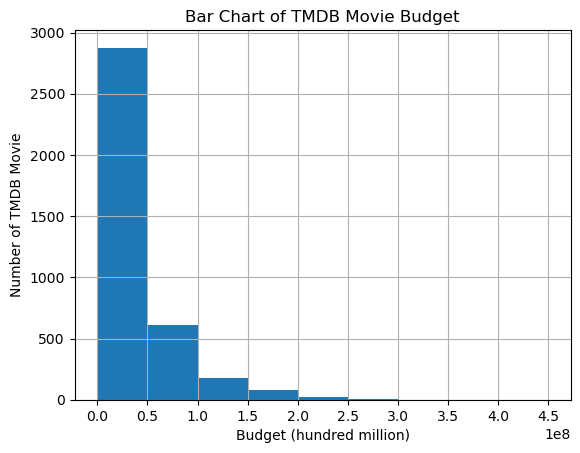

In [20]:
# Budget
x_ticks = np.arange(1.000000e+00, 5.000000e+08, 5.000000e+07)

budget['budget'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Budget")
plt.xlabel("Budget (hundred million)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie")

Text(0, 0.5, 'Number of TMDB Movie')

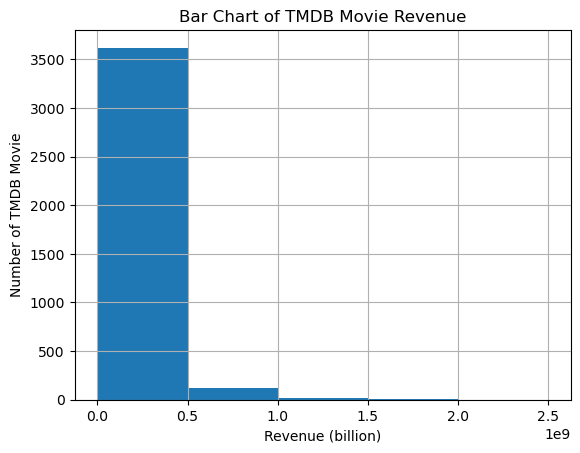

In [21]:
# Revenue
x_ticks = np.arange(0.000000e+00, 3.000000e+09, 5.000000e+08)

budget['revenue'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Revenue")
plt.xlabel("Revenue (billion)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie")

Text(0, 0.5, 'Revenue (100 million)')

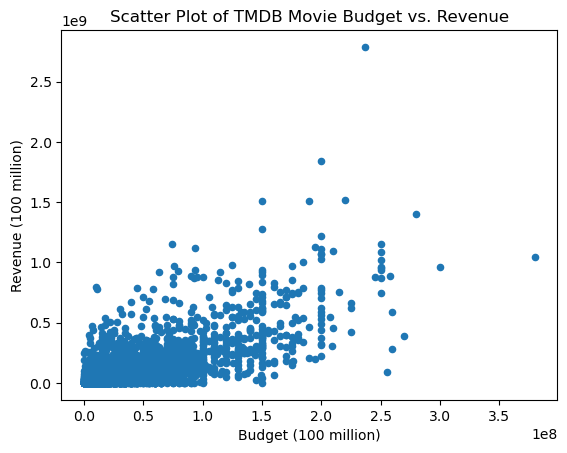

In [22]:
# Budget vs Revenue
budget.plot(y='revenue',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Revenue (100 million)")

In general, movies with a higher budget results in a higher revenue.

Text(0, 0.5, 'Profit (100 million)')

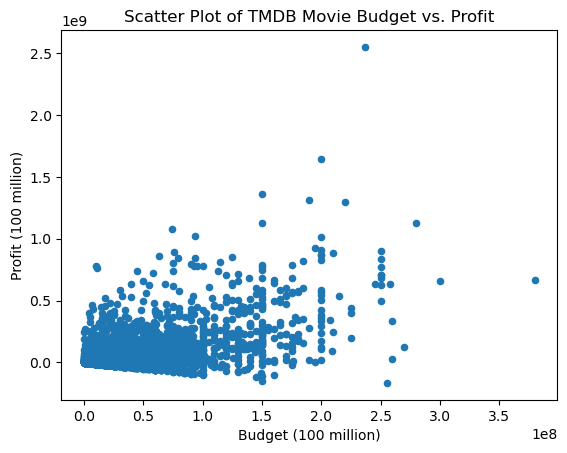

In [23]:
# Budget vs Profit
budget.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (100 million)")
plt.ylabel("Profit (100 million)")

In general, movies with a higher budget results in a higher profit.

For further analysis, we will filter for budgets with $100 million or more.

In [24]:
blockbuster = budget.query('budget > 1.000000e+08')
blockbuster.describe()

,id,popularity,budget,revenue,runtime,vote_average,profit,profit_margin
count,279.000000,279.000000,2.790000e+02,2.790000e+02,279.000000,279.000000,2.790000e+02,279.000000
mean,57207.240143,73.179527,1.550914e+08,4.843548e+08,121.688172,6.388172,3.292634e+08,-inf
std,78010.457364,68.963893,4.147266e+07,3.362338e+08,22.715306,0.752289,3.184821e+08,NaN
min,22.000000,2.871739,1.020000e+08,0.000000e+00,76.000000,4.100000,-1.657101e+08,-inf
25%,2071.000000,39.809016,1.250000e+08,2.630743e+08,103.000000,5.900000,1.199098e+08,46.140559
50%,20526.000000,58.485967,1.500000e+08,3.910812e+08,120.000000,6.400000,2.432589e+08,63.689722
75%,76703.000000,88.142983,1.750000e+08,6.507519e+08,137.500000,6.900000,4.995002e+08,75.962216
max,417859.000000,724.247784,3.800000e+08,2.787965e+09,194.000000,8.200000,2.550965e+09,91.499176


In [25]:
blockbuster.shape

(279, 13)

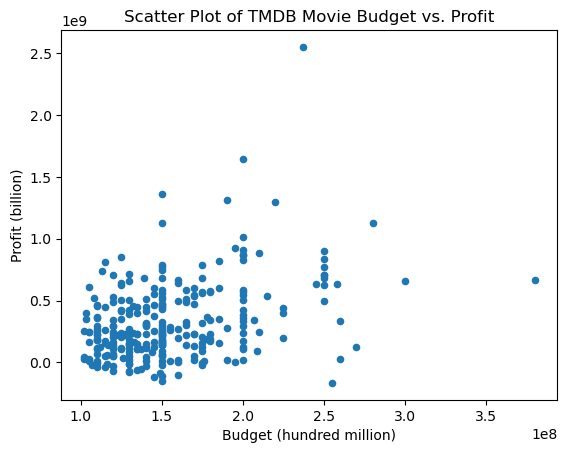

In [26]:
# Blockbuster - Budget vs Profit
blockbuster.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (hundred million)")
plt.ylabel("Profit (billion)");

There are more outlers when it comes to Blockbuster movies with higher budget, but not necessarily having high profit.

In [27]:
# GroupBy Movie Title and Budget, Revenue and Profit for Top 10 Movies
blockbuster_grouped = blockbuster.groupby('original_title')[['budget','revenue','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
blockbuster_grouped

,budget,revenue,profit
original_title,,,
Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802
Pirates of the Caribbean: At World's End,300000000,961000000,661000000
Avengers: Age of Ultron,280000000,1405403694,1125403694
Superman Returns,270000000,391081192,121081192
John Carter,260000000,284139100,24139100
Tangled,260000000,591794936,331794936
Spider-Man 3,258000000,890871626,632871626
The Lone Ranger,255000000,89289910,-165710090
Harry Potter and the Half-Blood Prince,250000000,933959197,683959197


Even a movie with 255 million budget can suffer losses, as you can see with "The Lone Ranger" making 165 million loss in profit.

***
### Question 2: Which genres are associated with high popularity?

Before we dive into the analysis, we must first understand what it means by popularity and how is it calculated?

On the TMDB website, the popularity metric is calculated based on Movies, TV Shows and People where it measures the number of votes and views, and number of users who marked it as their "favourite" or added into their "watchlist".

Source: https://developers.themoviedb.org/3/getting-started/popularity

In [28]:
df['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

It is interesting to note that there is a huge difference in number when comparing the max to any of the other metric, and the score for max is 875.58, not a rating of 10 as we would've expected from a generic popularity scheme.

I did some research and found an answer on the TMDB forum where one of the staff, Travis Bell shed some light on the popularity calculation. https://www.themoviedb.org/talk/5141d424760ee34da71431b0

> Upper no, this is the same as before. Lower, 0. It can be anywhere from 0 to essentially infinity.

What he means is that the popularity score starts from 0 and runs to infinity. This can be difficult to measure. Let's get the average popularity and uses it as our benchmark.

In [29]:
df['popularity'].mean()

21.49230058817409

In [30]:
genre = df.explode('genres')
genre.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,19995,150.437577,237000000,2787965087,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162.0,Action,7.2,2009,2550965087,91.499176
0,19995,150.437577,237000000,2787965087,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162.0,Adventure,7.2,2009,2550965087,91.499176
0,19995,150.437577,237000000,2787965087,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162.0,Fantasy,7.2,2009,2550965087,91.499176
0,19995,150.437577,237000000,2787965087,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162.0,Science Fiction,7.2,2009,2550965087,91.499176
1,285,139.082615,300000000,961000000,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,169.0,Adventure,6.9,2007,661000000,68.782518


In [31]:
genre['genres'].value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
                     28
TV Movie              8
Name: genres, dtype: int64

Text(0.5, 0, 'Count')

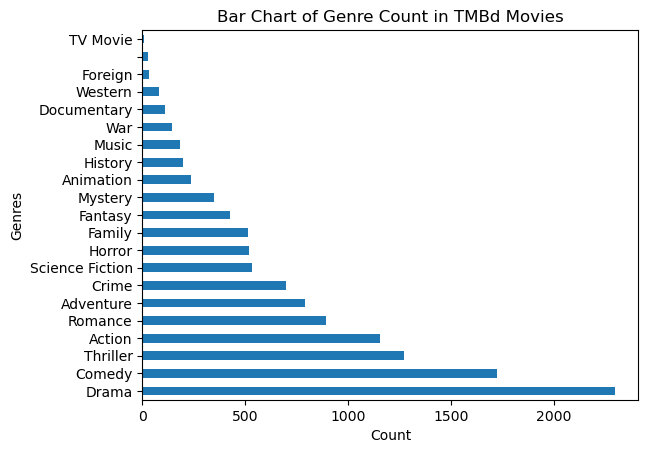

In [32]:
# Total Genre Count
genre['genres'].value_counts().plot.barh()

plt.title("Bar Chart of Genre Count in TMBd Movies")
plt.ylabel("Genres")
plt.xlabel("Count")

Highest count of genres are Drama, Comedy, and Thriller. Does it mean they're the most popular?

In [33]:
genre_mean = genre.groupby('genres')[['popularity','revenue','profit']].mean().sort_values('popularity', ascending=False)
genre_mean.iloc[:10,:].query("popularity > 0.6464455549010583")

,popularity,revenue,profit
genres,,,
Adventure,39.268042,2.086602e+08,1.423333e+08
Animation,38.813439,2.256930e+08,1.592271e+08
Science Fiction,36.451806,1.524565e+08,1.005910e+08
Fantasy,36.387043,1.933542e+08,1.297936e+08
Action,30.940382,1.412131e+08,8.970235e+07
Family,27.832849,1.623455e+08,1.116260e+08
Mystery,24.586827,7.830093e+07,4.755644e+07
Thriller,24.460077,8.104429e+07,4.907608e+07
War,23.777289,8.415587e+07,4.887342e+07


Doesn't seem like it. Here, we can see that Adventure, Animation, and Science Ficton are the most popular genres.

***
### Question 3: Which director produces the highest revenue movies?

In [34]:
df['director'].value_counts()

Steven Spielberg     27
Woody Allen          21
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         16
                     ..
Timothy Bjorklund     1
Marcus Dunstan        1
Lorene Scafaria       1
Jeff Lowell           1
Brian Herzlinger      1
Name: director, Length: 2349, dtype: int64

In [35]:
df.groupby('director')[['revenue','profit']].mean().sort_values('revenue', ascending=False).head()

,revenue,profit
director,,
Chris Buck,1.274219e+09,1.124219e+09
Kyle Balda,1.156731e+09,1.082731e+09
Lee Unkrich,1.066970e+09,8.669697e+08
Joss Whedon,9.879437e+08,8.082770e+08
Chris Renaud,8.759583e+08,8.009583e+08


In [36]:
df.groupby('director')[['revenue','profit']].mean().sort_values('profit', ascending=False).head()

,revenue,profit
director,,
Chris Buck,1.274219e+09,1.124219e+09
Kyle Balda,1.156731e+09,1.082731e+09
Lee Unkrich,1.066970e+09,8.669697e+08
Joss Whedon,9.879437e+08,8.082770e+08
Chris Renaud,8.759583e+08,8.009583e+08


In [37]:
df.query('director == "Chris Buck"').sort_values('profit', ascending=False).head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
124,109445,165.125366,150000000,1274219009,Frozen,"[Kristen Bell, Idina Menzel, Jonathan Groff, J...",Chris Buck,102.0,"[Animation, Adventure, Family]",7.3,2013,1124219009,88.228083


On average, the director producing the movie with the highest revenue and profit is Chris Buck, and the movie he produced is "Forzen".

### Question 4: Which actor is associated with higher popularity and revenue profit?

In [38]:
df_cast = df.explode('cast')
df_cast.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,19995,150.437577,237000000,2787965087,Avatar,Sam Worthington,James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009,2550965087,91.499176
0,19995,150.437577,237000000,2787965087,Avatar,Zoe Saldana,James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009,2550965087,91.499176
0,19995,150.437577,237000000,2787965087,Avatar,Sigourney Weaver,James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009,2550965087,91.499176
0,19995,150.437577,237000000,2787965087,Avatar,Stephen Lang,James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009,2550965087,91.499176
0,19995,150.437577,237000000,2787965087,Avatar,Michelle Rodriguez,James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009,2550965087,91.499176


In [39]:
df_cast['cast'].value_counts()

Samuel L. Jackson       67
 Jr.                    60
Robert De Niro          57
Bruce Willis            51
Matt Damon              48
                        ..
Loretta Fox              1
Nicholas John Renner     1
Joseph Anderson          1
Anthony Natale           1
Bill D'Elia              1
Name: cast, Length: 54200, dtype: int64

In [40]:
df_cast.groupby('cast')[['popularity','revenue']].sum().sort_values('popularity',ascending=False).head()

,popularity,revenue
cast,,
Stan Lee,3148.765152,17364063582
Samuel L. Jackson,2393.047345,14806065788
Matt Damon,2324.211831,7593266352
Morgan Freeman,2144.355814,9275477679
Geoffrey Rush,2137.050505,7714179706


In [41]:
df_cast.groupby('cast')[['popularity','revenue']].sum().sort_values('revenue',ascending=False).head()

,popularity,revenue
cast,,
Stan Lee,3148.765152,17364063582
Samuel L. Jackson,2393.047345,14806065788
Frank Welker,1416.084881,11614837160
John Ratzenberger,1538.157604,11038044745
Hugo Weaving,1320.217876,10822190781


In [42]:
df_cast.query('cast == "Stan Lee"').sort_values('revenue',ascending=False).head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
16,24428,144.448633,220000000,1519557910,The Avengers,Stan Lee,Joss Whedon,143.0,"[Science Fiction, Action, Adventure]",7.4,2012,1299557910,85.522105
7,99861,134.279229,280000000,1405403694,Avengers: Age of Ultron,Stan Lee,Joss Whedon,141.0,"[Action, Adventure, Science Fiction]",7.3,2015,1125403694,80.076899
31,68721,77.682080,200000000,1215439994,Iron Man 3,Stan Lee,Shane Black,130.0,"[Action, Adventure, Science Fiction]",6.8,2013,1015439994,83.545054
26,271110,198.372395,250000000,1153304495,Captain America: Civil War,Stan Lee,Anthony Russo,147.0,"[Adventure, Action, Science Fiction]",7.1,2016,903304495,78.323157
5,559,115.699814,258000000,890871626,Spider-Man 3,Stan Lee,Sam Raimi,139.0,"[Fantasy, Action, Adventure]",5.9,2007,632871626,71.039598


In [43]:
df_cast.query('cast == "Samuel L. Jackson"').sort_values('revenue',ascending=False).head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
16,24428,144.448633,220000000,1519557910,The Avengers,Samuel L. Jackson,Joss Whedon,143.0,"[Science Fiction, Action, Adventure]",7.4,2012,1299557910,85.522105
7,99861,134.279229,280000000,1405403694,Avengers: Age of Ultron,Samuel L. Jackson,Joss Whedon,141.0,"[Action, Adventure, Science Fiction]",7.3,2015,1125403694,80.076899
233,1893,54.035265,115000000,924317558,Star Wars: Episode I - The Phantom Menace,Samuel L. Jackson,George Lucas,136.0,"[Adventure, Action, Science Fiction]",6.3,1999,809317558,87.558388
675,329,40.413191,63000000,920100000,Jurassic Park,Samuel L. Jackson,Steven Spielberg,127.0,"[Adventure, Science Fiction]",7.6,1993,857100000,93.152918
229,1895,44.108427,113000000,850000000,Star Wars: Episode III - Revenge of the Sith,Samuel L. Jackson,George Lucas,140.0,"[Science Fiction, Adventure, Action]",7.1,2005,737000000,86.705882


Actors associated with higher revenue and profit are Stan Lee and Samuel L. Jackson, and they both acted in the "The Avengers" movie.

***
### Question 5: Which year produced movies with the highest grossing revenue?

In [44]:
df.sort_values('revenue',ascending=False).head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,19995,150.437577,237000000,2787965087,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162.0,"[Action, Adventure, Fantasy, Science Fiction]",7.2,2009,2550965087,91.499176
25,597,100.025899,200000000,1845034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",James Cameron,194.0,"[Drama, Romance, Thriller]",7.5,1997,1645034188,89.160092
16,24428,144.448633,220000000,1519557910,The Avengers,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",Joss Whedon,143.0,"[Science Fiction, Action, Adventure]",7.4,2012,1299557910,85.522105
28,135397,418.708552,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124.0,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386
44,168259,102.322217,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Dwayne Johnson, Mich...",James Wan,137.0,[Action],7.3,2015,1316249360,87.385887


"Avatar" produced in 2009 has the highest grossing revenue, followed by "Titanic" in 1997 and "The Avengers" in 2012.
***

## Conclusions
Let's revisit the questions and summarize our conclusion.

**Question 1: Does having a higher budget results in a higher revenue and profit?**
> In most cases, a higher budget does results in higher revenue and profit. However, the analysis shows that there are outlier where a high budget results in losses.


**Question 2: Which genres are associated with high popularity?**
> Adventure, Science Fiction and Fantasy are the most popular genres.

**Question 3: Which director produces the highest revenue movies?**
> Chris Buck is the director who produced the highest revenue with the movie "Forzen".

**Question 4: Which actor is associated with higher popularity and revenue profit?**
> Actors associated with higher revenue and profit are Stan Lee and Samuel L. Jackson, and they both acted in the "The Avengers" movie.

**Question 5: Which year produced movies with the highest grossing revenue?**
> "Avatar" produced in 2009 has the highest grossing revenue at $2.7 billion.
